# 第1章 ウェブからの注文数を分析する10本ノック (1~10)

In [1]:
# 下準備として，データのあるディレクトリに移動しておく
import os

DATA_ROOT_DIR = "./sample/1章/"
os.chdir(DATA_ROOT_DIR)

## ノック1 データを読み込んでみよう
色々なファイルを読み込んで，データの全体像を把握する．

In [2]:
import pandas as pd
customer_master = pd.read_csv("customer_master.csv")
customer_master.head()

,customer_id,customer_name,registration_date,customer_name_kana,email,gender,age,birth,pref
0,IK152942,平田 裕次郎,2019-01-01 00:25:33,ひらた ゆうじろう,hirata_yuujirou@example.com,M,29,1990/6/10,石川県
1,TS808488,田村 詩織,2019-01-01 01:13:45,たむら しおり,tamura_shiori@example.com,F,33,1986/5/20,東京都
2,AS834628,久野 由樹,2019-01-01 02:00:14,ひさの ゆき,hisano_yuki@example.com,F,63,1956/1/2,茨城県
3,AS345469,鶴岡 薫,2019-01-01 04:48:22,つるおか かおる,tsuruoka_kaoru@example.com,M,74,1945/3/25,東京都
4,GD892565,大内 高史,2019-01-01 04:54:51,おおうち たかし,oouchi_takashi@example.com,M,54,1965/8/5,千葉県


In [3]:
item_master = pd.read_csv("item_master.csv")
item_master.head()

,item_id,item_name,item_price
0,S001,PC-A,50000
1,S002,PC-B,85000
2,S003,PC-C,120000
3,S004,PC-D,180000
4,S005,PC-E,210000


In [4]:
transaction_1 = pd.read_csv("transaction_1.csv")
transaction_1.head()

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019
2,T0000000115,120000,2019-02-01 02:34:19,HD298120
3,T0000000116,210000,2019-02-01 02:47:23,IK452215
4,T0000000117,170000,2019-02-01 04:33:46,PL542865


In [5]:
transaction_detail_1 = pd.read_csv("transaction_detail_1.csv")
transaction_detail_1.head()

,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1
1,1,T0000000114,S001,1
2,2,T0000000115,S003,1
3,3,T0000000116,S005,1
4,4,T0000000117,S002,2


In [6]:
transaction_2 = pd.read_csv("transaction_2.csv")
transaction_2.head()

,transaction_id,price,payment_date,customer_id
0,T0000005113,295000,2019-06-15 07:20:27,TS169261
1,T0000005114,50000,2019-06-15 07:35:47,HI599892
2,T0000005115,85000,2019-06-15 07:56:36,HI421757
3,T0000005116,50000,2019-06-15 08:40:55,OA386378
4,T0000005117,120000,2019-06-15 08:44:23,TS506913


In [7]:
transaction_detail_2 = pd.read_csv("transaction_detail_2.csv")
transaction_detail_2.head()

,detail_id,transaction_id,item_id,quantity
0,5000,T0000004870,S002,3
1,5001,T0000004871,S003,1
2,5002,T0000004872,S001,2
3,5003,T0000004873,S004,1
4,5004,T0000004874,S003,2


## ノック2 データを結合(ユニオン)してみよう
データを行方向に結合する．(unionというらしい．)

In [8]:
unioned_transaction = pd.concat([transaction_1, transaction_2], ignore_index=True)
print("raws of transaction_1 :", len(transaction_1))
print("raws of transaction_2 :", len(transaction_2))
print("raws of unioned_transaction :", len(unioned_transaction))

raws of transaction_1 : 5000
raws of transaction_2 : 1786
raws of unioned_transaction : 6786


In [9]:
unioned_transaction_detail = pd.concat([transaction_detail_1, transaction_detail_2], ignore_index=True)
print("raws of transaction_detail_1 :", len(transaction_detail_1))
print("raws of transaction_detail_2 :", len(transaction_detail_2))
print("raws of unioned_transaction_detail :", len(unioned_transaction_detail))

raws of transaction_detail_1 : 5000
raws of transaction_detail_2 : 2144
raws of unioned_transaction_detail : 7144


## ノック3 売上データ同士を結合(ジョイン)してみよう
データを列方向に結合する．(joinというらしい．)

In [10]:
# "transaction_id"が共通キー, unioned_transaction_detailをメインにleft join

joined_transaction = pd.merge(unioned_transaction_detail, unioned_transaction[["transaction_id", "payment_date", "customer_id"]], on="transaction_id", how="left")
joined_transaction.head()

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865


## ノック4 マスターデータを結合(ジョイン)してみよう
今まで見てきたデータを全てjoinする

In [11]:
joined_data = pd.merge(joined_transaction, customer_master, on="customer_id", how="left")
joined_data = pd.merge(joined_transaction, item_master, on="item_id", how="left")
joined_data.head()

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id,item_name,item_price
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502,PC-E,210000
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019,PC-A,50000
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120,PC-C,120000
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215,PC-E,210000
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865,PC-B,85000


## ノック5 必要なデータ列を作ろう
売り上げ列("price")を作る

In [12]:
joined_data["price"] = joined_data["quantity"] * joined_data["item_price"]
joined_data[["quantity", "item_price", "price"]].head() 

,quantity,item_price,price
0,1,210000,210000
1,1,50000,50000
2,1,120000,120000
3,1,210000,210000
4,2,85000,170000


## ノック6 データ検算をしよう
データ加工前(unioned_transction)の"price"とデータ加工後(joined_data)の"price"を比較する

In [13]:
print("加工後 :", joined_data["price"].sum())
print("加工前 :", unioned_transaction["price"].sum())

加工後 : 971135000
加工前 : 971135000


## ノック7 各種統計量を把握しよう
データの欠損値や，データの規模感を把握する．

In [14]:
joined_data.isnull().sum()

detail_id         0
transaction_id    0
item_id           0
quantity          0
payment_date      0
customer_id       0
item_name         0
item_price        0
price             0
dtype: int64

In [15]:
joined_data.describe()

,detail_id,quantity,item_price,price
count,7144.000000,7144.000000,7144.000000,7144.000000
mean,3571.500000,1.199888,121698.628219,135937.150056
std,2062.439494,0.513647,64571.311830,68511.453297
min,0.000000,1.000000,50000.000000,50000.000000
25%,1785.750000,1.000000,50000.000000,85000.000000
50%,3571.500000,1.000000,102500.000000,120000.000000
75%,5357.250000,1.000000,187500.000000,210000.000000
max,7143.000000,4.000000,210000.000000,420000.000000


## ノック8 月別でデータを集計しよう
データの範囲を絞る

In [16]:
joined_data.dtypes

detail_id          int64
transaction_id    object
item_id           object
quantity           int64
payment_date      object
customer_id       object
item_name         object
item_price         int64
price              int64
dtype: object

In [17]:
joined_data["payment_date"] = pd.to_datetime(joined_data["payment_date"])
joined_data["payment_month"] = joined_data["payment_date"].dt.strftime("%Y%m")
joined_data[["payment_date", "payment_month"]].head()

,payment_date,payment_month
0,2019-02-01 01:36:57,201902
1,2019-02-01 01:37:23,201902
2,2019-02-01 02:34:19,201902
3,2019-02-01 02:47:23,201902
4,2019-02-01 04:33:46,201902


In [18]:
joined_data.groupby("payment_month").sum()["price"]

payment_month
201902    160185000
201903    160370000
201904    160510000
201905    155420000
201906    164030000
201907    170620000
Name: price, dtype: int64

## ノック9 月別，商品別でデータを集計してみよう
groupbyでデータの集計をする．pivot_tableも使ってみる．

In [19]:
joined_data.groupby(["payment_month", "item_name"]).sum()[["price", "quantity"]]

price  quantity
payment_month item_name                    
201902        PC-A       24150000       483
              PC-B       25245000       297
              PC-C       19800000       165
              PC-D       31140000       173
              PC-E       59850000       285
201903        PC-A       26000000       520
              PC-B       25500000       300
              PC-C       19080000       159
              PC-D       25740000       143
              PC-E       64050000       305
201904        PC-A       25900000       518
              PC-B       23460000       276
              PC-C       21960000       183
              PC-D       24300000       135
              PC-E       64890000       309
201905        PC-A       24850000       497
              PC-B       25330000       298
              PC-C       20520000       171
              PC-D       25920000       144
              PC-E       58800000       280
201906        PC-A       26000000       520
              PC-B       23970000       282
              PC-C       21840000       182
              PC-D       28800000       160
              PC-E       63420000       302
201907        PC-A       25250000       505
              PC-B       28220000       332
              PC-C       19440000       162
              PC-D       26100000       145
              PC-E       71610000       341

In [20]:
pd.pivot_table(joined_data, index="item_name", columns="payment_month", values=["price", "quantity"], aggfunc="sum")

price                                                    \
payment_month    201902    201903    201904    201905    201906    201907   
item_name                                                                   
PC-A           24150000  26000000  25900000  24850000  26000000  25250000   
PC-B           25245000  25500000  23460000  25330000  23970000  28220000   
PC-C           19800000  19080000  21960000  20520000  21840000  19440000   
PC-D           31140000  25740000  24300000  25920000  28800000  26100000   
PC-E           59850000  64050000  64890000  58800000  63420000  71610000   

              quantity                                     
payment_month   201902 201903 201904 201905 201906 201907  
item_name                                                  
PC-A               483    520    518    497    520    505  
PC-B               297    300    276    298    282    332  
PC-C               165    159    183    171    182    162  
PC-D               173    143    135    144    160    145  
PC-E               285    305    309    280    302    341

## ノック10 商品別の売上推移を可視化してみよう
グラフ用のデータ作成と，matplotlibを用いたグラフ化

In [21]:
graph_data = pd.pivot_table(joined_data, index="payment_month", columns="item_name", values="price", aggfunc="sum")
graph_data.head()

item_name,PC-A,PC-B,PC-C,PC-D,PC-E
payment_month,,,,,
201902,24150000,25245000,19800000,31140000,59850000
201903,26000000,25500000,19080000,25740000,64050000
201904,25900000,23460000,21960000,24300000,64890000
201905,24850000,25330000,20520000,25920000,58800000
201906,26000000,23970000,21840000,28800000,63420000


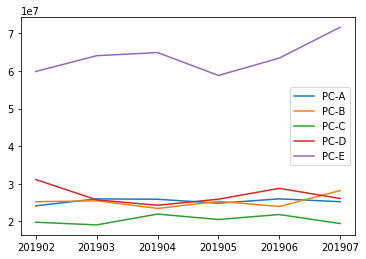

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

label_list = ["PC-{}".format(c) for c in "ABCDE"]
for label in label_list:
    plt.plot(list(graph_data.index), graph_data[label], label=label)
plt.legend()
